In [ ]:
import pandas as pd
import numpy as np

### buy and hold
1. 결측치 및 이상치를 조회 및 삭제
2. 종가를 기준으로 수익율 측정 
3. 일별 수익율 파생변수 
4. CAGR, MDD, VOL, sharpe를 출력

In [ ]:
## 데이터 로드 
df = pd.read_csv("../csv/AAPL.csv", index_col='Date')
df.head(2)

In [ ]:
## 결측치 및 이상치를 조회
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [7]:
## 결측치 및 이상치를 제외한 데이터를 출력
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [12]:
## 종가만 사용 (Adj Close) 

#case1
# df[["Adj Close"]]

#case2
price_df = df.loc[:, ["Adj Close"]]

<AxesSubplot:xlabel='Date'>

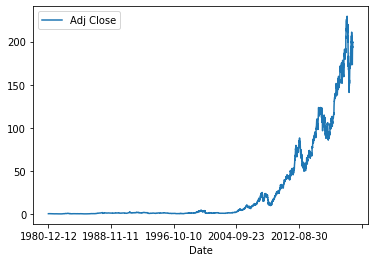

In [13]:
price_df.plot()

In [18]:
## 일별 수익율 생성
## (오늘 날짜의 종가 - 어제 날짜의 종가) / 어제 날짜의 종가
# daily_rtn 파생변수로 생성

# case1 diff(), shift()
price_df['Adj Close'].diff() / price_df['Adj Close'].shift()

# case2 shift()
(price_df['Adj Close'] - price_df["Adj Close"].shift()) / price_df['Adj Close'].shift()

# case3 pct_change()
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()

In [19]:
price_df.head(10)

,Adj Close,daily_rtn
Date,,
1980-12-12,0.410525,NaN
1980-12-15,0.389106,-0.052175
1980-12-16,0.360548,-0.073394
1980-12-17,0.369472,0.024751
1980-12-18,0.380182,0.028987
1980-12-19,0.403385,0.061031
1980-12-22,0.423019,0.048673
1980-12-23,0.440868,0.042194
1980-12-24,0.464072,0.052633


In [22]:
## 일별 수익율 가지고 총 수익율을 구하려면?
## 누적곱 cumprod()
## st_rtn 파생변수 생성
price_df['st_rtn'] = (1 + price_df['daily_rtn']).cumprod()

In [ ]:
price_df.head(10)

<AxesSubplot:xlabel='Date'>

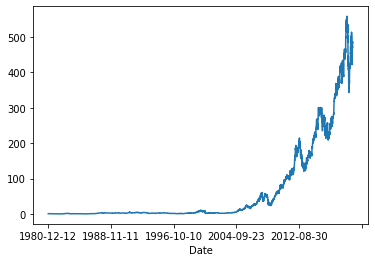

In [24]:
price_df['st_rtn'].plot()

In [28]:
## 종가를 기준으로 수익율 계산
# 마지막 데이터의 종가 / 처음 데이터의 종가
# 데이터프레임.index --> list 형태의 데이터가 출력
# list형태의 데이터에서 첫번째 원소가 구매일, list 마지막 원소가 판매일
# 데이터프레임 필터링 판매일에 종가 / 구매일의 종가 --> 수익율 
price_df.index
first_date = price_df.index[0]
last_date = price_df.index[-1]

## 구매일에 종가 출력
price_df.loc[last_date, 'Adj Close'] / price_df.loc[first_date, 'Adj Close']


485.15924243346933

In [29]:

## 누적 수익율 출력
price_df.loc[last_date, 'st_rtn']

485.15924243347024

In [25]:
a = [1,2,3,4,5]
## 변수명[index] --> index 위치의 데이터가 출력
# list 데이터에서 첫번째 값 출력
print(a[0])
# list 데이터에서 마지막 값 출력
print(a[-1])

1
5


<AxesSubplot:xlabel='Date'>

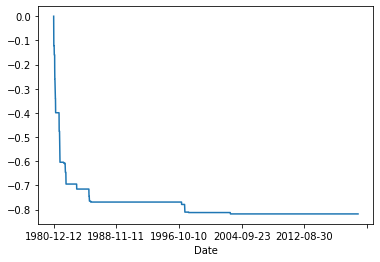

In [30]:
# backtesting 

# cummax() - 기준 값에서 최고가 저장
# cummin() - 기준 값에서 최저가 저장

historical_max = price_df['Adj Close'].cummax()
daily_drawdown = price_df["Adj Close"] / historical_max - 1.0
## 최대 낙폭 
historical_min =  daily_drawdown.cummin()
historical_min.plot()

In [31]:
## CAGR, MDD, VOL, sharpe 출력
## CAGR : 일별 date 사용 -> 
# 전체 연도를 계산하는 경우 영업일 기간을 252일 기준으로 나눈 역수 제곱한 후 -1
## MDD : 최대 낙폭
## VOL : 연 주가 수익율 표준편차 = 일별 주가 수익율 * 252일 제곱근
## sharpe : 총 위험 1단위당 초과 수익율
CAGR = price_df.loc[last_date, 'st_rtn'] ** (252/len(price_df)) - 1
MDD = historical_min.min()
VOL = np.std(price_df["daily_rtn"] * np.sqrt(252))
sharpe = np.mean(price_df["daily_rtn"])/\
    np.std(price_df["daily_rtn"])*np.sqrt(252)

In [32]:
print('CAGR : ', round(CAGR*100, 2), '%')
print('Sharpe : ', round(sharpe, 2))
print('VOL : ', round(VOL*100, 2), '%')
print('MDD : ', round(-1*MDD*100, 2), '%')

CAGR :  17.4 %
Sharpe :  0.58
VOL :  45.7 %
MDD :  81.8 %


In [33]:
VOL

0.4570483127920231

In [41]:
import buy_and_hold as bah
import imp
imp.reload(bah)

<module 'buy_and_hold' from 'g:\\ubion\\금융 빅데이터 6기\\221220\\buy_and_hold\\__init__.py'>

In [35]:
## 데이터프레임 로드 
df_2 = pd.read_csv("../csv/AMZN.csv", index_col='Date')

In [36]:
## 클래스 생성
bh = bah.BuyAndHold(df_2, 'Adj Close')

In [ ]:
bh.drop_na()

In [ ]:
bh.add_col()

In [39]:
bh.testing()

[0.3657939001986632,
 0.8136327617304075,
 0.6008984712355606,
 -0.944042179261863]

In [ ]:
print('CAGR : ', round(CAGR*100, 2), '%')
print('Sharpe : ', round(sharpe, 2))
print('VOL : ', round(VOL*100, 2), '%')
print('MDD : ', round(-1*MDD*100, 2), '%')

In [42]:
import yfinance as yf

In [46]:
df_3 = yf.download('003490.KS', start='2018-01-01')
df_3.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1223 entries, 2018-01-02 to 2022-12-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1223 non-null   float64
 1   High       1223 non-null   float64
 2   Low        1223 non-null   float64
 3   Close      1223 non-null   float64
 4   Adj Close  1223 non-null   float64
 5   Volume     1223 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 66.9 KB


In [47]:
df_3

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,34100.0,36100.0,34100.0,35900.0,35715.164062,1360084
2018-01-03,35950.0,36150.0,35550.0,35750.0,35565.937500,497403
2018-01-04,35500.0,35950.0,34900.0,34900.0,34720.312500,571308
2018-01-05,35250.0,35250.0,34450.0,34900.0,34720.312500,489822
2018-01-08,35100.0,36150.0,35100.0,36100.0,35914.136719,841491
...,...,...,...,...,...,...
2022-12-14,25500.0,25650.0,25150.0,25250.0,25250.000000,1065370
2022-12-15,25300.0,25500.0,24800.0,24850.0,24850.000000,1143521
2022-12-16,24500.0,24750.0,24200.0,24700.0,24700.000000,1245099


In [48]:
bh_2 = bah.BuyAndHold(df_3, 'Close')

In [49]:
bh_2.drop_na()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,34100.0,36100.0,34100.0,35900.0,35715.164062,1360084
2018-01-03,35950.0,36150.0,35550.0,35750.0,35565.937500,497403
2018-01-04,35500.0,35950.0,34900.0,34900.0,34720.312500,571308
2018-01-05,35250.0,35250.0,34450.0,34900.0,34720.312500,489822
2018-01-08,35100.0,36150.0,35100.0,36100.0,35914.136719,841491
...,...,...,...,...,...,...
2022-12-14,25500.0,25650.0,25150.0,25250.0,25250.000000,1065370
2022-12-15,25300.0,25500.0,24800.0,24850.0,24850.000000,1143521
2022-12-16,24500.0,24750.0,24200.0,24700.0,24700.000000,1245099


In [50]:
bh_2.add_col()

,Open,High,Low,Close,Adj Close,Volume,daily_rtn,st_rtn
Date,,,,,,,,
2018-01-02,34100.0,36100.0,34100.0,35900.0,35715.164062,1360084,NaN,NaN
2018-01-03,35950.0,36150.0,35550.0,35750.0,35565.937500,497403,-0.004178,0.995822
2018-01-04,35500.0,35950.0,34900.0,34900.0,34720.312500,571308,-0.023776,0.972145
2018-01-05,35250.0,35250.0,34450.0,34900.0,34720.312500,489822,0.000000,0.972145
2018-01-08,35100.0,36150.0,35100.0,36100.0,35914.136719,841491,0.034384,1.005571
...,...,...,...,...,...,...,...,...
2022-12-14,25500.0,25650.0,25150.0,25250.0,25250.000000,1065370,-0.011742,0.703343
2022-12-15,25300.0,25500.0,24800.0,24850.0,24850.000000,1143521,-0.015842,0.692201
2022-12-16,24500.0,24750.0,24200.0,24700.0,24700.000000,1245099,-0.006036,0.688022


In [51]:
bh_2.testing()

[-0.07609454195203713,
 0.029661156890595602,
 0.4177720663388616,
 -0.760603518158236]

In [52]:
bh_2.df

,Open,High,Low,Close,Adj Close,Volume,daily_rtn,st_rtn
Date,,,,,,,,
2018-01-02,34100.0,36100.0,34100.0,35900.0,35715.164062,1360084,NaN,NaN
2018-01-03,35950.0,36150.0,35550.0,35750.0,35565.937500,497403,-0.004178,0.995822
2018-01-04,35500.0,35950.0,34900.0,34900.0,34720.312500,571308,-0.023776,0.972145
2018-01-05,35250.0,35250.0,34450.0,34900.0,34720.312500,489822,0.000000,0.972145
2018-01-08,35100.0,36150.0,35100.0,36100.0,35914.136719,841491,0.034384,1.005571
...,...,...,...,...,...,...,...,...
2022-12-14,25500.0,25650.0,25150.0,25250.0,25250.000000,1065370,-0.011742,0.703343
2022-12-15,25300.0,25500.0,24800.0,24850.0,24850.000000,1143521,-0.015842,0.692201
2022-12-16,24500.0,24750.0,24200.0,24700.0,24700.000000,1245099,-0.006036,0.688022
